### DATA DESCRIPTION: 

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. 

 RowNumber: Row Numbers from 1 to 10000 

 CustomerId: Unique Ids for bank customer identification 

 Surname: Customer's last name 

 CreditScore: Credit score of the customer 

 Geography: The country from which the customer belongs 

 Gender: Male or Female 

 Age: Age of the customer 

 Tenure: Number of years for which the customer has been with the bank 

 Balance: Bank balance of the customer 

 NumOfProducts: Number of bank products the customer is utilising 

 HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not 

 IsActiveMember: Binary Flag for whether the customer is an active member with the bank or not 

 EstimatedSalary: Estimated salary of the customer in Dollars 

 Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained 

 > Target Column Description: Exited is a class label used to divide into groups (customer closed account or not). 
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print('Number of Rows =', df.shape[0])
print('Number of Columns =', df.shape[1])

Number of Rows = 10000
Number of Columns = 14


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Since Row number and surname are unique and wont have any impact on the model, we will drop these two columns.
Also, Since CustomerID is unique, we will make this column as index.

In [6]:
df = df.drop(['RowNumber', 'Surname'], axis = 1)
df = df.set_index('CustomerId')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values.

In [8]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

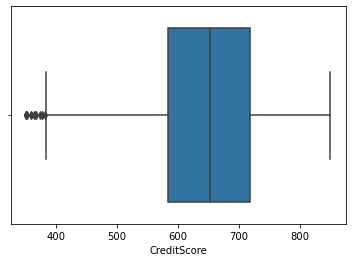

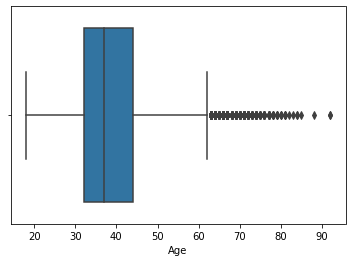

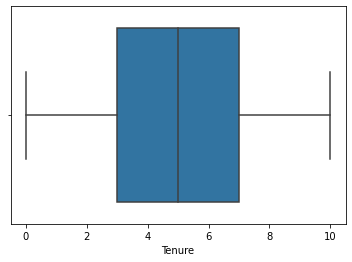

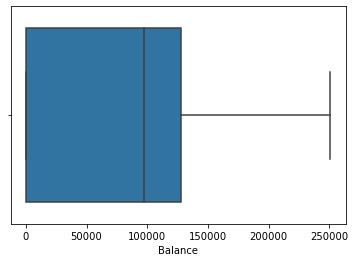

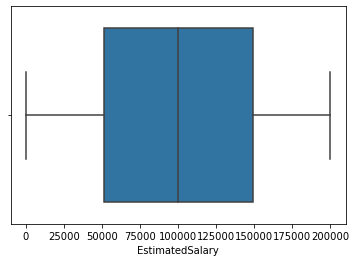

In [9]:
num_var = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']]
for col in num_var.columns:
    sns.boxplot(num_var[col])
    plt.show()

0    79.63
1    20.37
Name: Exited, dtype: float64


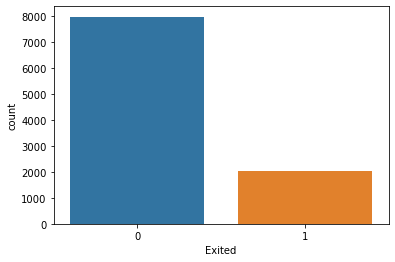

In [10]:
print(df['Exited'].value_counts(normalize = True) * 100)
sns.countplot(df['Exited'])
plt.show()

Therefore around 20.37% of the people have exited.
Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy. 
As this 20% of people are of interest to the bank, it is important to accurately predict the customers that are exited.

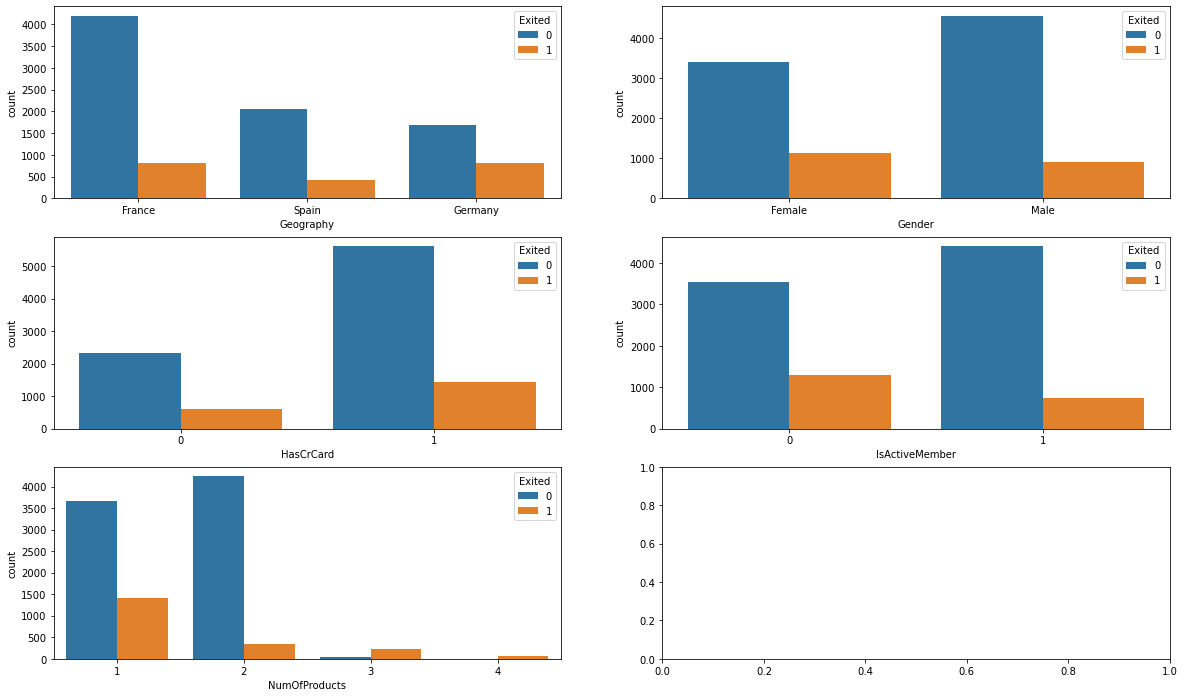

In [11]:
f,a = plt.subplots(3,2, figsize = (20,12))
sns.countplot(x = 'Geography', hue = 'Exited', data = df, ax = a[0,0])
sns.countplot(x = 'Gender', hue = 'Exited', data = df, ax = a[0,1])
sns.countplot(x = 'HasCrCard', hue = 'Exited', data = df, ax = a[1,0])
sns.countplot(x = 'IsActiveMember', hue = 'Exited', data = df, ax = a[1,1])
sns.countplot(x = 'NumOfProducts', hue = 'Exited', data = df, ax = a[2,0])
plt.show()

- Majority of the customers are from France, While Germany has the highest proportion of exited to retained customers.
- The proportion of Female customers exiting is greater than male customers.
- Majority of the exited customers were having Credit cards.
- Most of the exited customers were inactive members.
- Most of the exited customers had only 1 product. However, the ratio of customers exited to customers retained is more when the customers have 3 and 4 products. 

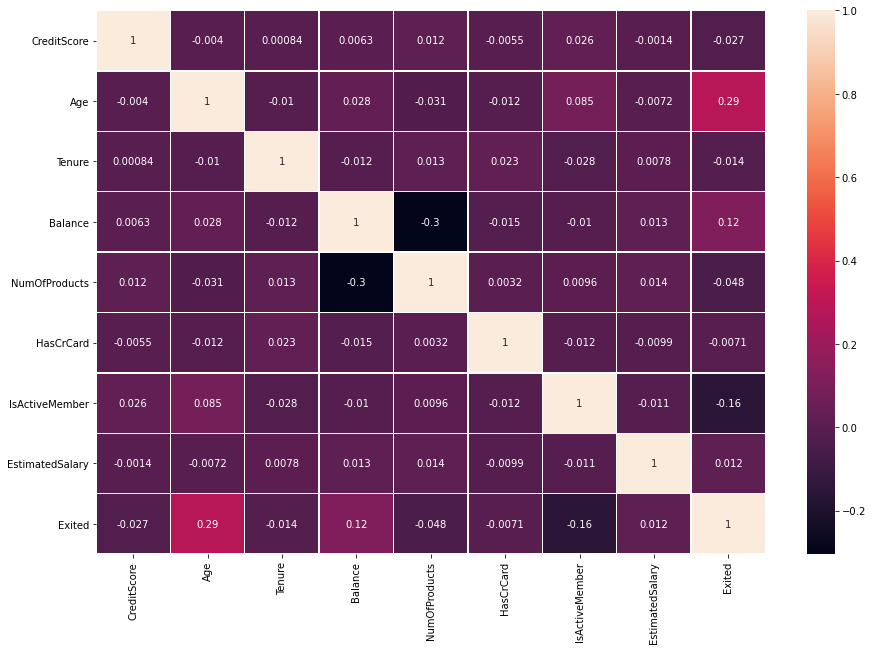

In [12]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(), annot = True, linewidths= 0.5)
plt.show()

- From the above heatmap, we can see that there is no much correlation between the variables.

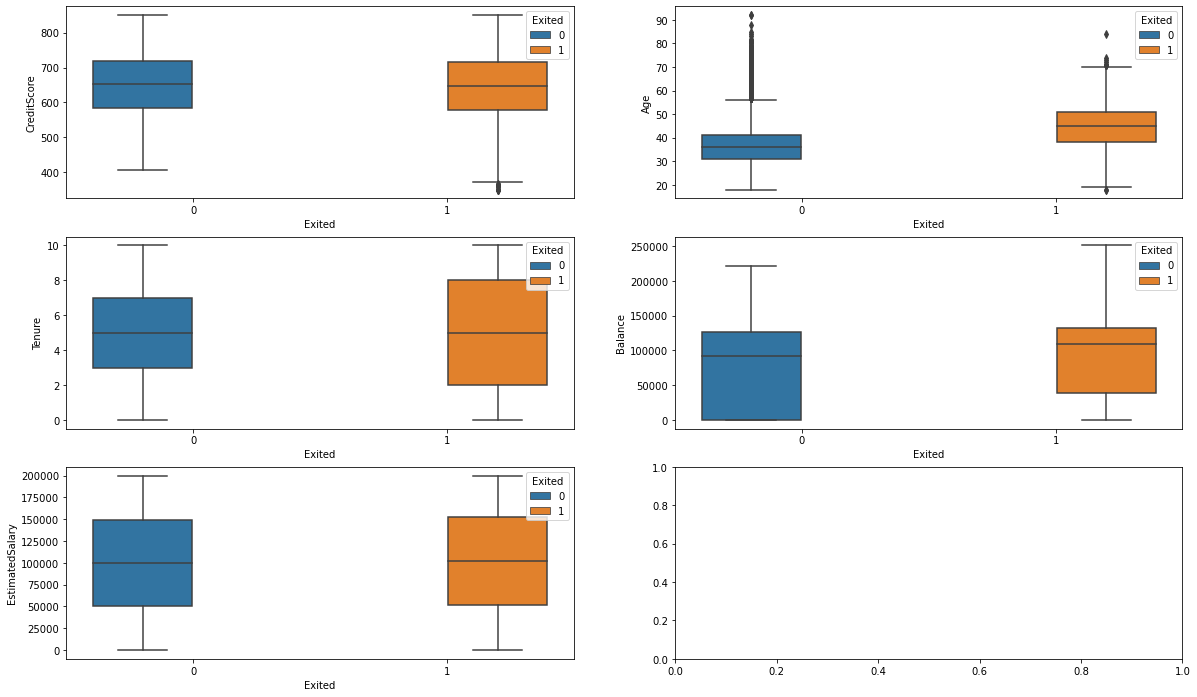

In [13]:
f,a = plt.subplots(3,2, figsize = (20,12))
sns.boxplot(y = 'CreditScore', x = 'Exited', hue = 'Exited', data = df, ax = a[0,0])
sns.boxplot(y = 'Age', x = 'Exited', hue = 'Exited', data = df, ax = a[0,1])
sns.boxplot(y = 'Tenure', x = 'Exited',hue = 'Exited', data = df, ax = a[1,0])
sns.boxplot(y = 'Balance', x = 'Exited',hue = 'Exited', data = df, ax = a[1,1])
sns.boxplot(y = 'EstimatedSalary', x = 'Exited',hue = 'Exited', data = df, ax = a[2,0])
plt.show()

- There is no significant difference in the credit score distribution retained and exited customers.
- The older customers are exiting more than the younger ones.
- The customers on either extreme end (spent very little time with the bank or spent lot of time with the bank) are more likely to exit.
- More customers with significant balance are exiting.
- Salary does not have any significant effect of the likelyhood of exiting.

In [14]:
df_dum =  pd.get_dummies(df, columns= ['Geography' ,'Gender'], drop_first= True)
df_dum.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CustomerId,,,,,,,,,,,,
15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('Exited', axis = 1)
y = df_dum['Exited']

xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.3, random_state = 10)

print('X train shape',xtrain.shape)
print('X test shape',xtest.shape)
print('y train shape',ytrain.shape)
print('y test shape',ytest.shape)



X train shape (7000, 11)
X test shape (3000, 11)
y train shape (7000,)
y test shape (3000,)


We will use Naive Bayes, K Nearest Neighbours, Decision tree and Random Forest algorithms to evlaute the base model.

In [16]:
from sklearn.metrics import classification_report, accuracy_score
def fit_and_Evaluate(model):
    model.fit(xtrain, ytrain)
    model_pred = model.predict(xtest)
    print('Accuracy =', accuracy_score(ytest,model_pred))
    print('Classification Report :\n', classification_report(ytest,model_pred))   

In [17]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
fit_and_Evaluate(nb)


Accuracy = 0.7786666666666666
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      2380
           1       0.32      0.06      0.11       620

    accuracy                           0.78      3000
   macro avg       0.56      0.51      0.49      3000
weighted avg       0.70      0.78      0.72      3000



In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
fit_and_Evaluate(knn)

Accuracy = 0.7543333333333333
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      2380
           1       0.24      0.09      0.13       620

    accuracy                           0.75      3000
   macro avg       0.52      0.51      0.49      3000
weighted avg       0.68      0.75      0.71      3000



In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

fit_and_Evaluate(dt)

Accuracy = 0.7876666666666666
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      2380
           1       0.49      0.49      0.49       620

    accuracy                           0.79      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.79      0.79      0.79      3000



In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
fit_and_Evaluate(rf)

Accuracy = 0.86
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.96      0.92      2380
           1       0.77      0.46      0.58       620

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.85      0.86      0.85      3000



From the above results we can see that Random Forest has the best performance with an accuracy of 0.854.
we will draw the confusion matrix for Random Forest

In [21]:
from sklearn.metrics import confusion_matrix
ypred = rf.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)

[[2295   85]
 [ 335  285]]


To imporve overall efficiency of the model, we will use RandomSearchCV to tune the Hyper parameters.

In [22]:
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier()
param_dist = {'n_estimators': sp_randint(50, 250),
             'max_depth': sp_randint(2,25),
             'max_features' : sp_randint(2,12)}

In [23]:
from sklearn.model_selection import RandomizedSearchCV

rsearch = RandomizedSearchCV(rfc, param_distributions = param_dist, scoring = 'roc_auc', random_state = 10)
rsearch.fit(X,y)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027791595088>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000277915951C8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027791595688>},
                   random_state=10, scoring='roc_auc')

In [24]:
rsearch.best_params_

{'max_depth': 11, 'max_features': 6, 'n_estimators': 65}

In [25]:
rfc = RandomForestClassifier(**rsearch.best_params_, random_state = 10)
fit_and_Evaluate(rfc)

Accuracy = 0.8603333333333333
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2380
           1       0.77      0.46      0.58       620

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [26]:
ypred = rfc.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)

[[2297   83]
 [ 336  284]]


- By tuning the hyperparameters, we have brought down the false positive rate from 92 to 83.
- Accuracy has increased form 0.854 to 0.8603

- Accuracy of the tuned model is 0.8603. Hence it can accurately predict customer churn  by 86%.
- Tuning the base model by using max_depth as 11, max_feature as 6 and n_estimators as 65 helped imporve the model accuracy.
- A false positive(predicting that the customer will be retained, when the customer will actuall exit) is more dangerous to the business of the bank. The rate of False posivtive prediction in the tuned model is lower than the base model. But, for ideal secnario it should be 0.


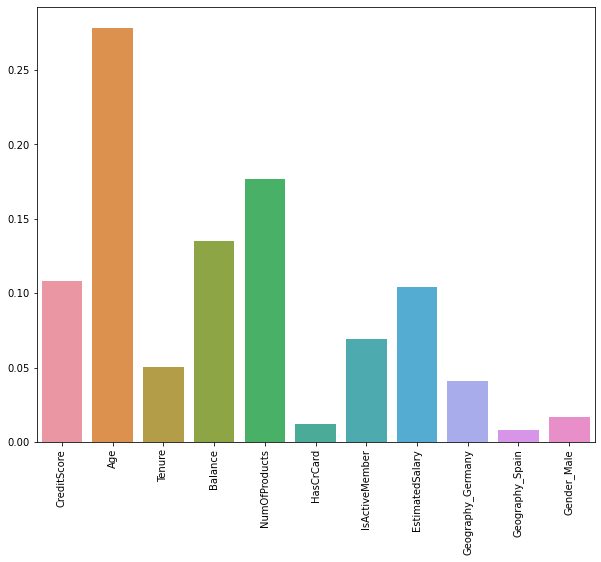

In [31]:
plt.figure(figsize = (10,8))
sns.barplot(xtrain.columns, rfc.feature_importances_)
plt.xticks(rotation='vertical')
plt.show()